In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import jax

import jax.numpy as jnp
from jax import random

import sys
sys.path.append('jam')
from dynamics import dynamics as dyn
from dynamics import utils as dutils
import train_utils as tutils
import datasets

/ssd003/home/kirill/venvs/jax-env/lib/python3.9/site-packages/flax/core/frozen_dict.py:169: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(
2023-05-30 16:42:10.616671: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /pkgs/cuda-11.8/targets/x86_64-linux/lib:/pkgs/cudnn-8.8/lib:/pkgs/cuda-11.8/targets/x86_64-linux/lib:/pkgs/cudnn-8.8/lib:/pkgs/cuda-11.8/targets/x86_64-linux/lib:/pkgs/cudnn-8.8/lib:/pkgs/cuda-11.8/targets/x86_64-linux/lib:/pkgs/cudnn-8.8/lib:
2023-05-30 16:42:10.617119: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared obje

In [3]:
dutils._DYNAMICS

{'generation': <function dynamics.dynamics.generation(key, data, t, t0=0.0, t1=1.0)>,
 'superres': <function dynamics.dynamics.superres(key, data, t, t0=0.0, t1=1.0)>,
 'color': <function dynamics.dynamics.color(key, data, t, t0=0.0, t1=1.0)>,
 'vpsde': <function dynamics.dynamics.vpsde(key, data, t, t0=0.0, t1=1.0)>}

In [4]:
key = random.PRNGKey(0)
from configs.am.cifar import generation as config
config = config.get_config()
train_ds, test_ds, _ = datasets.get_dataset(config, additional_dim=None)
train_iter = iter(train_ds)
scaler = datasets.get_image_scaler(config)
inverse_scaler = datasets.get_image_inverse_scaler(config)

data = jnp.array(train_iter.next()['image'])[0]
data = scaler(data)

2023-05-30 16:42:16.256331: W external/xla/xla/service/gpu/nvptx_compiler.cc:564] The NVIDIA driver's CUDA version is 11.4 which is older than the ptxas CUDA version (11.8.89). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [5]:
def plot_dynamics(key, data, name):
  gen_dynamics = dutils.get_dynamics(name)
  t = jnp.linspace(0.0, 1.0, 10).reshape(-1,1,1,1)
  batch = jnp.tile(data[:1], (len(t),1,1,1))
  x_0, x_1, x_t = gen_dynamics(key, batch, t)
  for i in range(x_t.shape[0]):
    plt.subplot(1,x_t.shape[0],i+1)
    plt.xticks([])
    plt.yticks([])
    plt.box(False)
    plt.imshow(jax.lax.clamp(0.0, inverse_scaler(jnp.array(x_t[i][:,:,:3])), 1.0))

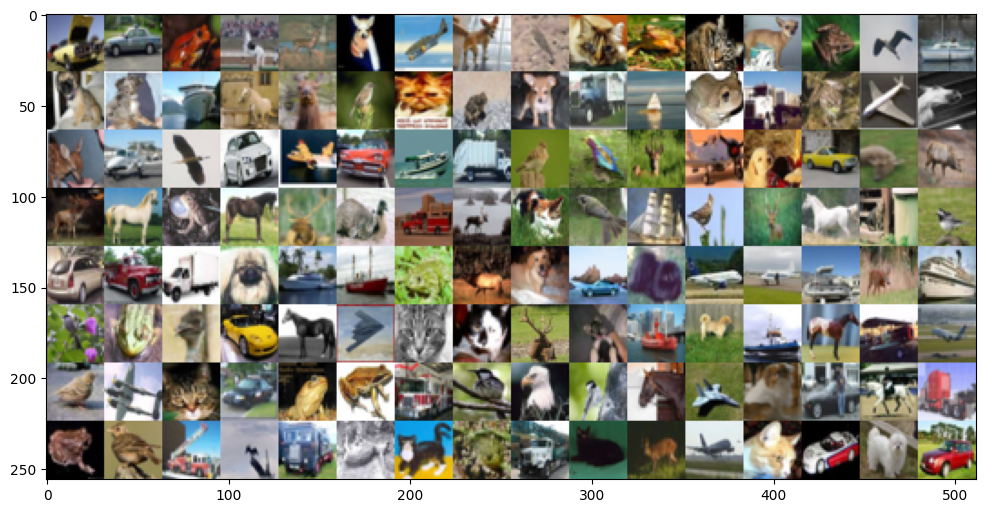

In [95]:
plt.style.use('default')
data = jnp.array(train_iter.next()['image'])
data = scaler(data)
large_im = np.zeros([8*32,16*32,3])
for i in range(8):
  for j in range(16):
    large_im[i*32:(i+1)*32,j*32:(j+1)*32,:] = data[0][i*16+j]
figsize(12,8)
plt.imshow(inverse_scaler(large_im))

In [105]:
cat_ua = data[0,118:119]

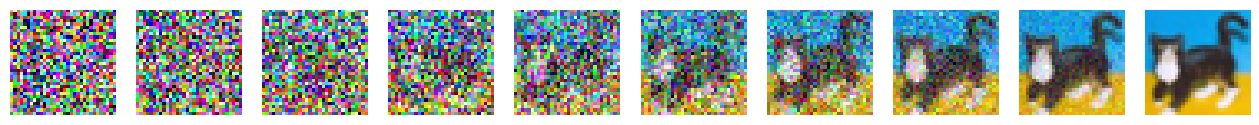

In [106]:
figsize(16,5)
plot_dynamics(random.fold_in(key, int('generation', base=36)), cat_ua, 'generation')
# plt.savefig('jam/assets/dynamics_generation.pdf', bbox_inches='tight')

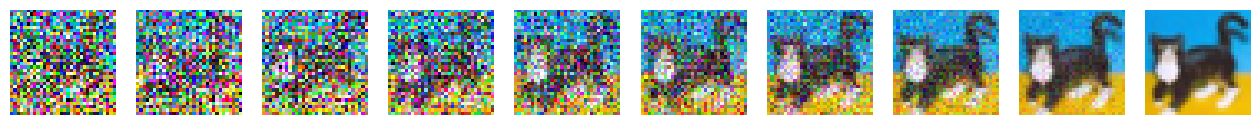

In [107]:
figsize(16,5)
plot_dynamics(random.fold_in(key, int('superres', base=36)), cat_ua, 'superres')
# plt.savefig('jam/assets/dynamics_superres.pdf', bbox_inches='tight')

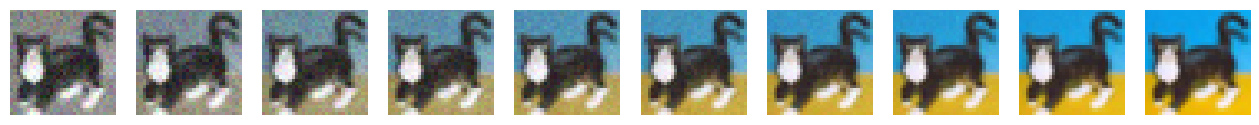

In [108]:
figsize(16,5)
plot_dynamics(random.fold_in(key, int('color', base=36)), cat_ua, 'color')
# plt.savefig('jam/assets/dynamics_color.pdf', bbox_inches='tight')